<a href="https://colab.research.google.com/github/vansh1612/EDA_21BDS0202/blob/main/21bds0202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully!

   rownames  Anger Gender         item     resp  id  btype   situ  mode r2
0         1     20      M  S1WantCurse       no   1  curse  other  want  N
1         2     11      M  S1WantCurse       no   2  curse  other  want  N
2         3     17      F  S1WantCurse  perhaps   3  curse  other  want  Y
3         4     21      F  S1WantCurse  perhaps   4  curse  other  want  Y
4         5     17      F  S1WantCurse  perhaps   5  curse  other  want  Y

🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  7584 non-null   int64 
 1   Anger     7584 non-null   int64 
 2   Gender    7584 non-null   object
 3   item      7584 non-null   object
 4   resp      7584 non-null   object
 5   id        7584 non-null   int64 
 6   btype     7584 non-null   object
 7   situ      7584 non-null   object
 8   mode     

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


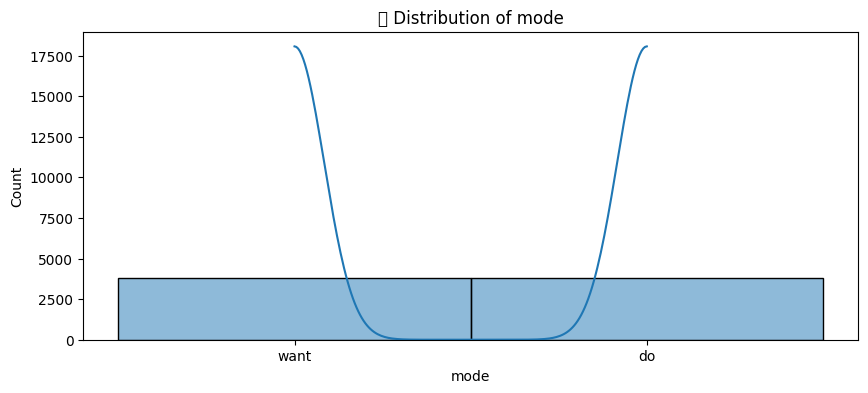

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


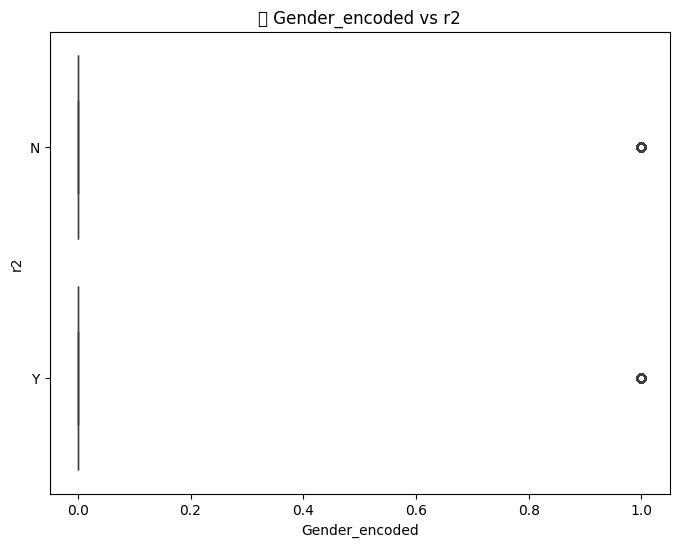

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


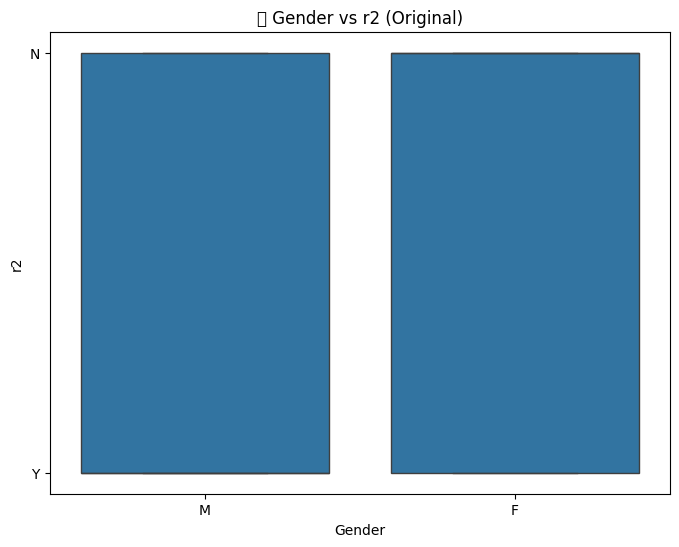

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


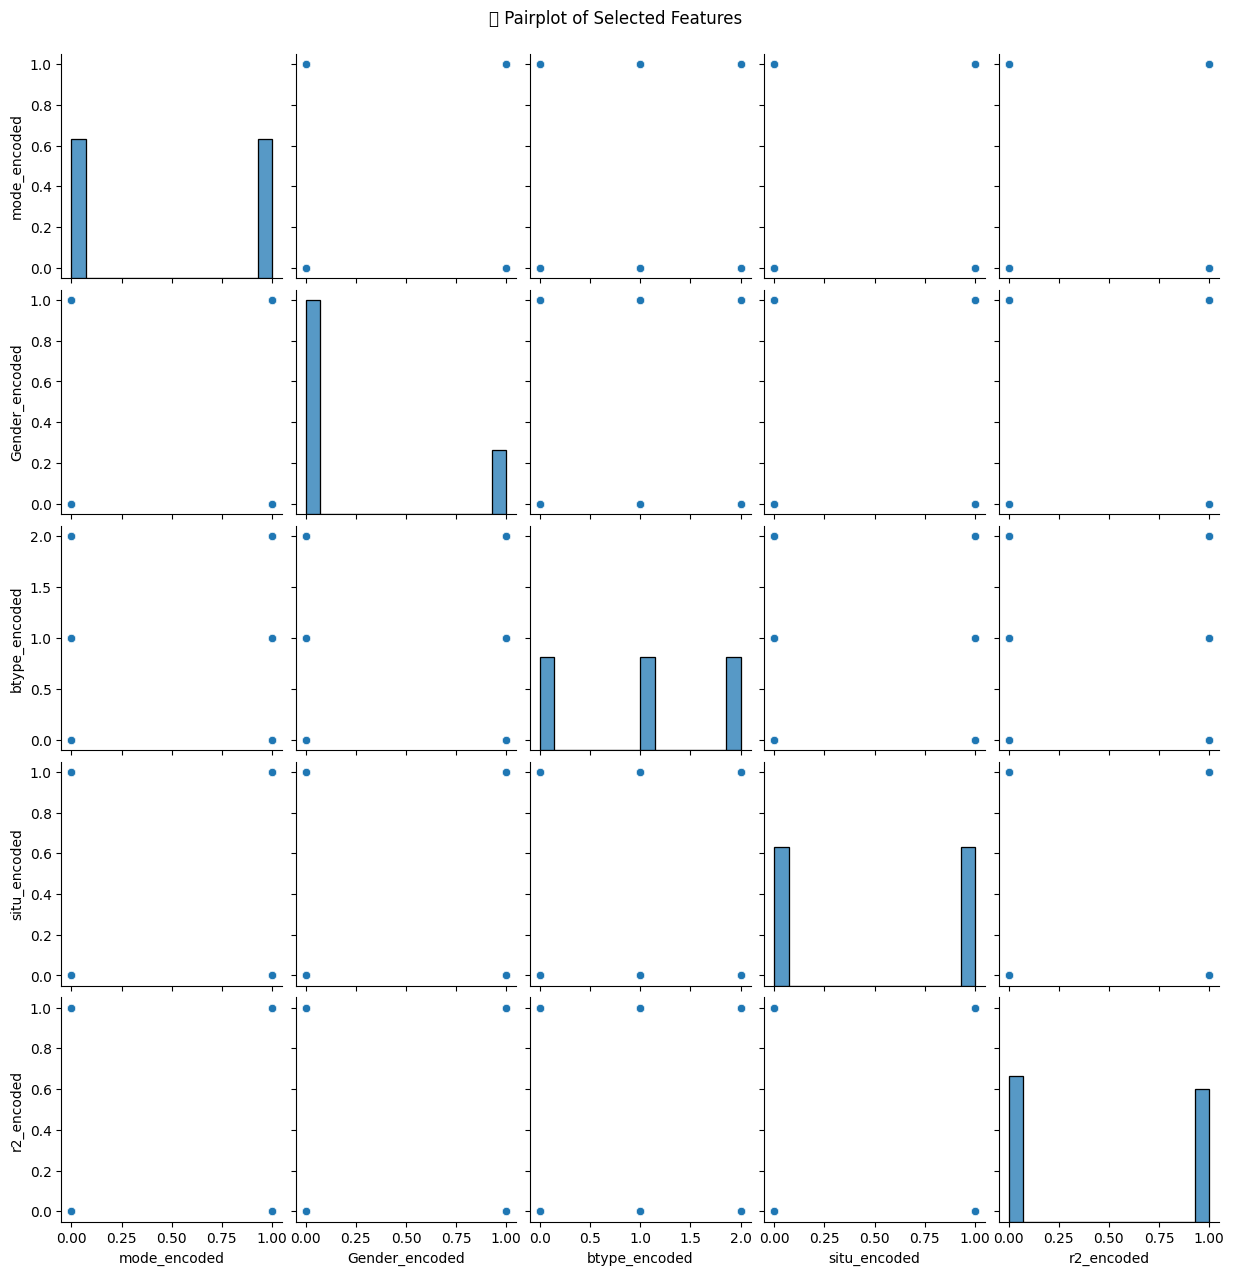


⏰ Time Columns Check:
Index([], dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


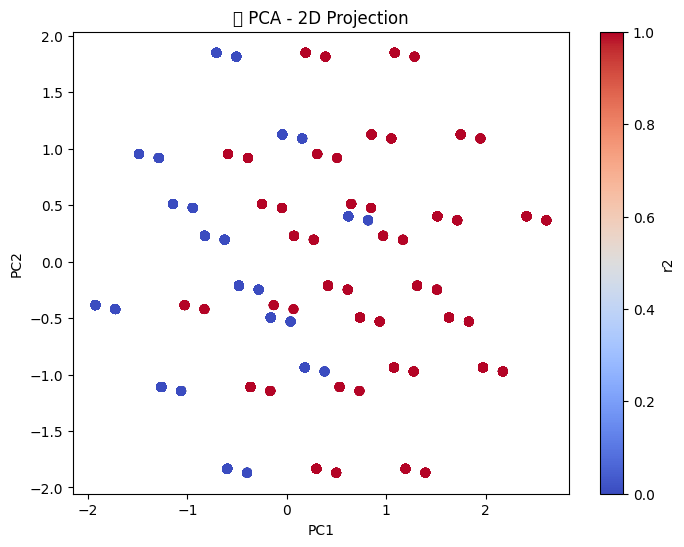


✅ Confusion Matrix:
 [[803   0]
 [  0 714]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       714

    accuracy                           1.00      1517
   macro avg       1.00      1.00      1.00      1517
weighted avg       1.00      1.00      1.00      1517


✅ Accuracy Score: 1.0


In [ ]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 📥 Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv"
df = pd.read_csv(url)
print("✅ Dataset Loaded Successfully!\n")
print(df.head())

# 📊 Basic Info
print("\n🧾 Dataset Info:")
df.info()

print("\n🔍 Missing Values:")
print(df.isnull().sum())

# ✅ Data Cleaning
df.dropna(inplace=True)

# 🔁 Label Encoding categorical columns
le = LabelEncoder()
categorical_columns = ['Gender', 'mode', 'btype', 'situ', 'resp']

for col in categorical_columns:
    if col in df.columns:
        df[col + '_encoded'] = le.fit_transform(df[col])
        print(f"✅ Encoded {col} -> {col}_encoded")
    else:
        print(f"⚠️ Column {col} not found in dataset.")

# 📈 1D Visualization
plt.figure(figsize=(10, 4))
sns.histplot(df['mode'], kde=True)
plt.title('📊 Distribution of mode')
plt.show()

# 📊 2D Visualization using encoded Gender
if 'Gender_encoded' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender_encoded', y='r2', data=df)
    plt.title('🧍 Gender_encoded vs r2')
    plt.show()
else:
    print("⚠️ Gender_encoded column not found for boxplot.")

# Optional: Original Gender boxplot
if 'Gender' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender', y='r2', data=df)
    plt.title('🧍 Gender vs r2 (Original)')
    plt.show()

# 🧩 N-D Visualization using Pairplot
# Use only numeric or encoded columns
pairplot_cols = ['mode_encoded', 'Gender_encoded', 'btype_encoded', 'situ_encoded']
if 'r2' in df.columns:
    # Encode r2 if it's categorical
    df['r2_encoded'] = le.fit_transform(df['r2'])
    pairplot_cols.append('r2_encoded')

sns.pairplot(df[pairplot_cols])
plt.suptitle('🔗 Pairplot of Selected Features', y=1.02)
plt.show()

# ⏱️ Time-Series Check
print("\n⏰ Time Columns Check:")
print(df.columns[df.columns.str.contains('date|time', case=False)])

# 📐 PCA for Dimensionality Reduction
features = df.select_dtypes(include=[np.number]).drop(columns=['r2_encoded', 'Anger', 'id', 'rownames'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['r2_encoded'], cmap='coolwarm')
plt.title('📉 PCA - 2D Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='r2')
plt.show()

# 🔨 Model Building
X = features
y = df['r2_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 📊 Model Evaluation
y_pred = model.predict(X_test)

print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  7584 non-null   int64 
 1   Anger     7584 non-null   int64 
 2   Gender    7584 non-null   object
 3   item      7584 non-null   object
 4   resp      7584 non-null   object
 5   id        7584 non-null   int64 
 6   btype     7584 non-null   object
 7   situ      7584 non-null   object
 8   mode      7584 non-null   object
 9   r2        7584 non-null   object
dtypes: int64(3), object(7)
memory usage: 592.6+ KB

Missing Values:
rownames    0
Anger       0
Gender      0
item        0
resp        0
id          0
btype       0
situ        0
mode        0
r2          0
dtype: int64
Encoded Gender -> Gender_encoded
Encoded item -> item_encoded
Encoded resp -> resp_encoded
Encoded btype -> btype_encoded
Encoded situ -> situ_encoded
Encoded mode -> mode_encoded
Encoded r2 -> r2_enc

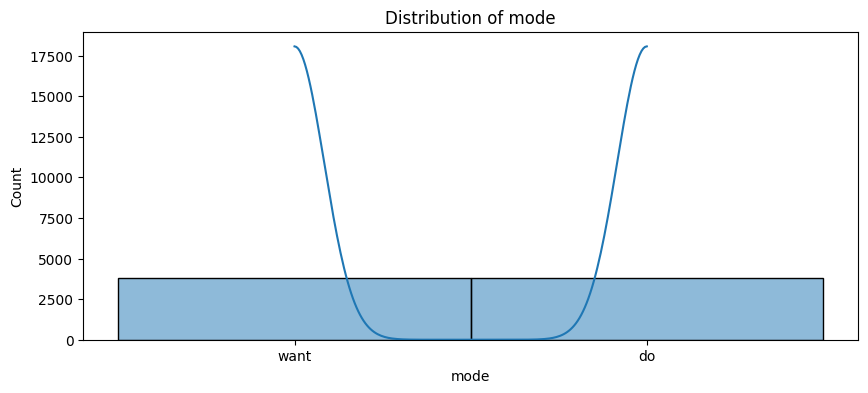

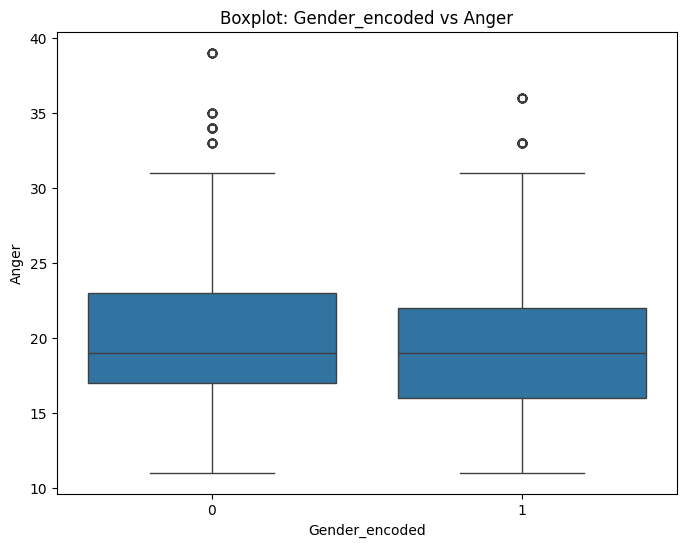

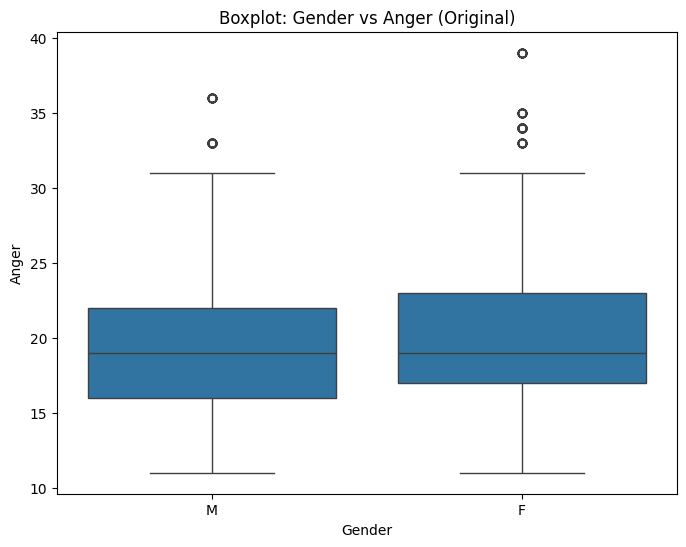

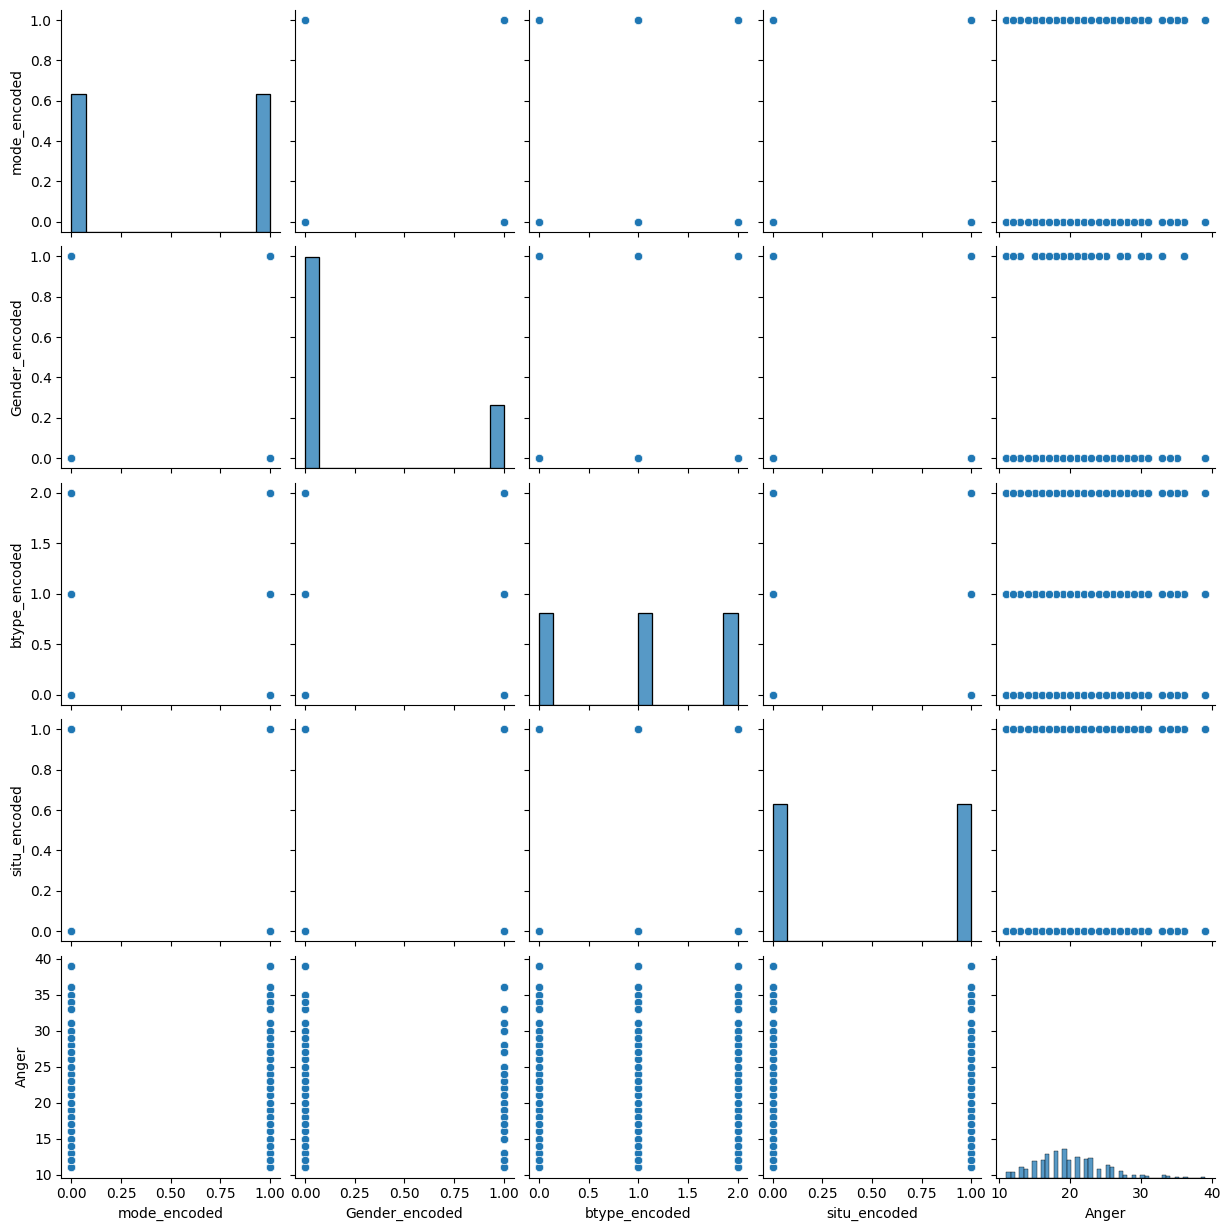

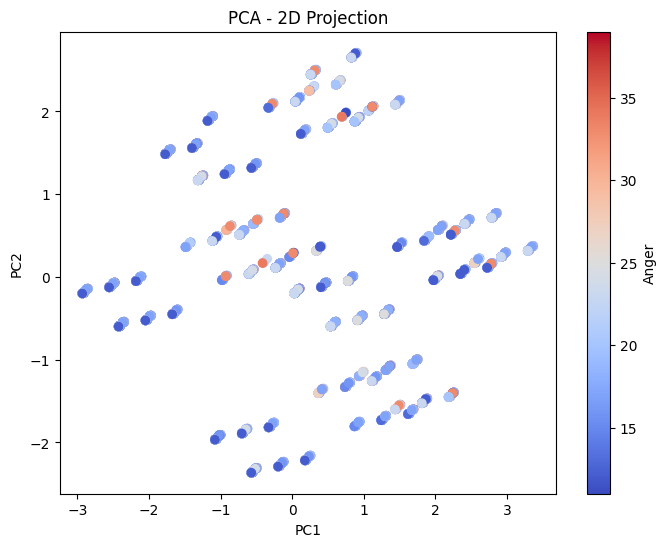


Confusion Matrix:
 [[  0   0   0   0   0   0   0   0  25   0   1   3   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   2  16   0   3   3   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1  51   0   3   5   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2  43   0   1   4   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2  60   0   7   7   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1  70   0   8   7   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5  89   0  10  12   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4 120   0   8   5   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   2 141   0   6   6   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [14]:
# 📌 Exploratory Data Analysis (EDA) Notebook - VerbAgg Dataset

# ✅ 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ✅ 2. Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv"
df = pd.read_csv(url)
df.head()

# ✅ 3. Dataset Info
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

# ✅ 4. Data Cleaning
# Drop rows with missing values (if any)
df.dropna(inplace=True)

# ✅ 5. Label Encoding for Categorical Variables
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns

encoded_columns = []
for col in categorical_cols:
    encoded_col = col + '_encoded'
    df[encoded_col] = le.fit_transform(df[col])
    encoded_columns.append(encoded_col)
    print(f"Encoded {col} -> {encoded_col}")

print("\nAll columns after encoding:")
print(df.columns)

# ✅ 6. 1D Visualizations
plt.figure(figsize=(10, 4))
sns.histplot(df['mode'], kde=True)
plt.title('Distribution of mode')
plt.show()

# ✅ 7. 2D Visualizations (Boxplot with encoded and original gender)
if 'Gender_encoded' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender_encoded', y='Anger', data=df)
    plt.title('Boxplot: Gender_encoded vs Anger')
    plt.show()
else:
    print("gender_encoded column not found for boxplot!")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Anger', data=df)
plt.title('Boxplot: Gender vs Anger (Original)')
plt.show()

# ✅ 8. Pairplot with Encoded Columns
pairplot_cols = ['mode_encoded', 'Gender_encoded', 'btype_encoded', 'situ_encoded', 'Anger']
pairplot_cols = [col for col in pairplot_cols if col in df.columns]

if len(pairplot_cols) > 1:
    sns.pairplot(df[pairplot_cols])
    plt.show()
else:
    print("Not enough numeric columns for pairplot.")

# ✅ 9. Dimensionality Reduction using PCA
features = df.select_dtypes(include=[np.number]).drop(columns=['Anger'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Anger'], cmap='coolwarm')
plt.title('PCA - 2D Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Anger')
plt.show()

# ✅ 10. Model Building (Logistic Regression)
X = features
y = df['Anger']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ 11. Model Evaluation
y_pred = model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
